In [4]:
import pandas as pd

# Sample dataset
data = {
    'day_of_week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'temperature': [22, 28, 19, 21, 25, 30, 27],
    'humidity': [65, 55, 80, 70, 60, 50, 75],
    'wind_speed': [10, 5, 12, 9, 15, 6, 8],
    'pressure': [1012, 1018, 1009, 1010, 1013, 1020, 1016],
    'rain': [1, 0, 1, 0, 0, 0, 1]  # Target variable (1 = Rain, 0 = No rain)
}

df = pd.DataFrame(data)
print(df)


  day_of_week  temperature  humidity  wind_speed  pressure  rain
0      Monday           22        65          10      1012     1
1     Tuesday           28        55           5      1018     0
2   Wednesday           19        80          12      1009     1
3    Thursday           21        70           9      1010     0
4      Friday           25        60          15      1013     0
5    Saturday           30        50           6      1020     0
6      Sunday           27        75           8      1016     1


In [ ]:
###For a case of Missing data open the missing data file
# Check for missing values

# //print(df.isnull().sum())

# Fill missing values (if any)
# df.fillna(df.mean(), inplace=True)


       temperature   humidity  wind_speed     pressure      rain
count     7.000000   7.000000    7.000000     7.000000  7.000000
mean     24.571429  65.000000    9.285714  1014.000000  0.428571
std       4.035556  10.801234    3.450328     4.123106  0.534522
min      19.000000  50.000000    5.000000  1009.000000  0.000000
25%      21.500000  57.500000    7.000000  1011.000000  0.000000
50%      25.000000  65.000000    9.000000  1013.000000  0.000000
75%      27.500000  72.500000   11.000000  1017.000000  1.000000
max      30.000000  80.000000   15.000000  1020.000000  1.000000


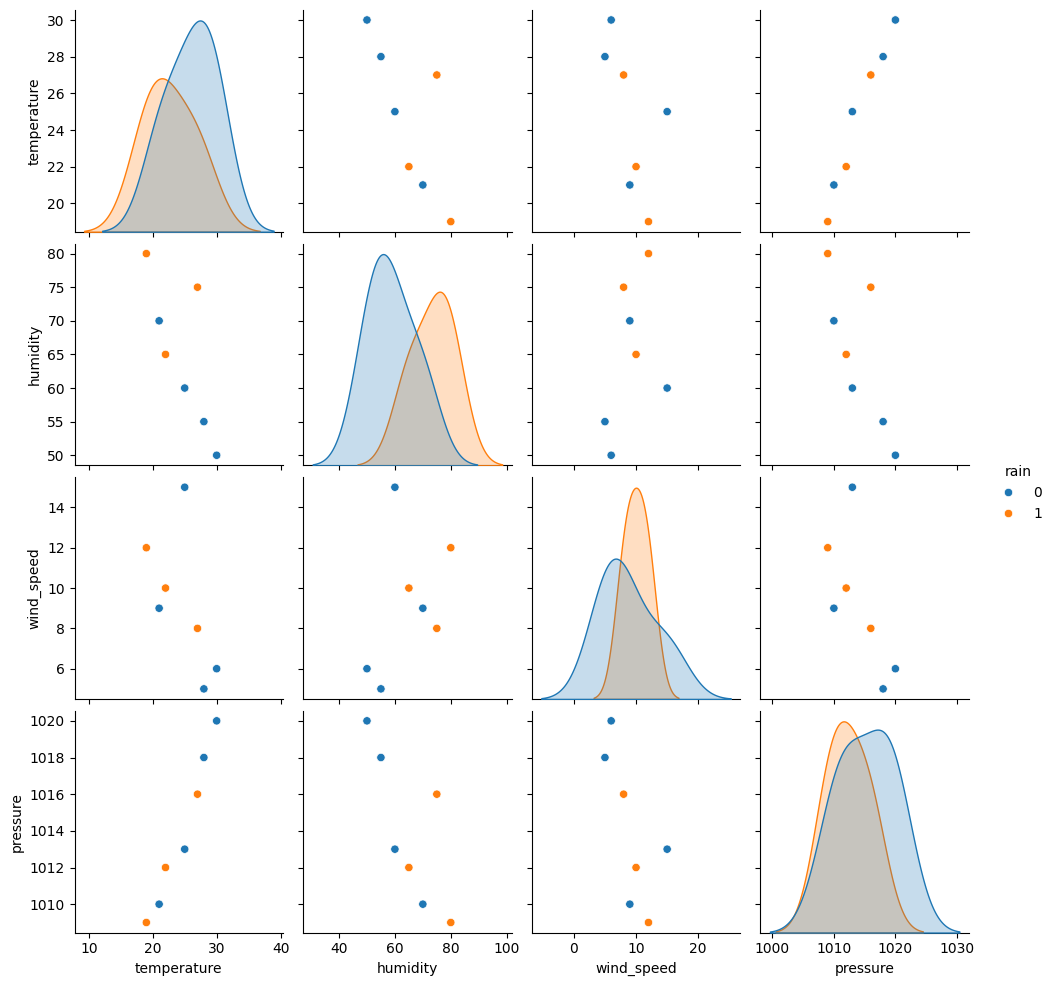

In [5]:
# Summary statistics of the dataset
print(df.describe())

# Visualize the data (simple plots, e.g., temperature vs rain)
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot to visualize relationships
sns.pairplot(df, hue='rain')
plt.show()


 ## Encoding Categorical Variables
Machine learning models work with numbers, so we need to convert categorical data (like the day of the week) into numerical form. This process is called encoding.

In [6]:
# Encoding 'day_of_week' using one-hot encoding
df = pd.get_dummies(df, columns=['day_of_week'])
print(df)

   temperature  humidity  wind_speed  pressure  rain  day_of_week_Friday  \
0           22        65          10      1012     1               False   
1           28        55           5      1018     0               False   
2           19        80          12      1009     1               False   
3           21        70           9      1010     0               False   
4           25        60          15      1013     0                True   
5           30        50           6      1020     0               False   
6           27        75           8      1016     1               False   

   day_of_week_Monday  day_of_week_Saturday  day_of_week_Sunday  \
0                True                 False               False   
1               False                 False               False   
2               False                 False               False   
3               False                 False               False   
4               False                 False             

 ## Splitting Data into Features and Target
Next, we split the dataset into features (X) and the target variable (y).
Features (X): These are the inputs the model uses to make predictions.
Target (y): This is the output the model is trying to predict.

In [7]:
# Features are everything except the target variable 'rain'

X = df.drop('rain', axis=1)

# Target variable is 'rain'
y = df['rain']


## Train-Test Split
To evaluate the model’s performance, we split the data into a training set and a test set. The training set is used to train the model, and the test set is used to evaluate it.
Training Set: Used to train the model.
Test Set: Used to evaluate how well the model performs on unseen data.

In [8]:
from sklearn.model_selection import train_test_split

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 5
Test set size: 2


## Building a Machine Learning Model
Now that the data is prepared, we can build a machine learning model to predict whether it will rain or not.

Let’s use a Decision Tree Classifier. This is a simple model that works by splitting the data into branches based on feature values (like a flowchart).

Decision Tree: This model splits the data based on feature values to make predictions. It's easy to understand and visualize.

Training the Model: This step involves learning the patterns in the training data.



In [9]:
from sklearn.tree import DecisionTreeClassifier

# Define the model
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

## Making Predictions
Once the model is trained, we use it to make predictions on the test set.
Prediction: The model takes the test data (which it hasn’t seen before) and makes predictions on whether it will rain or not.


In [10]:
# Make predictions on the test data
y_pred = model.predict(X_test)

print(f"Predictions: {y_pred}")
print(f"Actual values: {y_test.values}")


Predictions: [0 0]
Actual values: [1 0]


## Evaluating the Model
To understand how well the model is performing, we use metrics like accuracy and confusion matrix.

### Accuracy:
 This tells us the percentage of correct predictions out of all predictions made.
### Confusion Matrix: 
This gives a detailed breakdown of correct and incorrect predictions.
### Classification Report: 
Includes precision, recall, and F1-score, which provide deeper insights into how well the model performs for each class (rain vs. no rain).

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.50
Confusion Matrix:
[[1 0]
 [1 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



c:\Users\jacob\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jacob\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jacob\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Improving the Model 
You can improve the model by tuning hyperparameters or trying more advanced models. For example, you could:

Use cross-validation to better assess performance.
Tune the max_depth of the decision tree to avoid overfitting.

Hyperparameters: These are parameters that control the behavior of the model (like the depth of the tree).

In [12]:
# Improve the model by tuning hyperparameters
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Re-evaluate the improved model
accuracy = accuracy_score(y_test, y_pred)
print(f"Improved Accuracy: {accuracy:.2f}")


Improved Accuracy: 0.50


# Summary
Data Preparation: Cleaning and structuring data for analysis.
Exploratory Data Analysis (EDA): Understanding the data through visualizations and statistics.
Modeling: Training a machine learning model on the prepared data.
Evaluation: Measuring model performance using metrics like accuracy and confusion matrix.